In [50]:
#EE224 Pset 7
#Author: Kapil Dheeriya
#June 6, 2023
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
pi = np.pi
sq2 = np.sqrt(2)

## Problem 1

Part D

In [99]:
#Plot Code
def heatmap2d(arr: np.ndarray, axislabels = None):
    # define axes grid
    fig = plt.figure(frameon=False,figsize=(12, 8))
    fig.subplots_adjust(top=0.95)
    grid = AxesGrid(
        fig, 111, 
        nrows_ncols=(1, 2),
        axes_pad=0.5,
        cbar_mode='each',
        cbar_location='right',
        cbar_pad=0.1
    )   
    # plot 
    real_image = grid[0].imshow(np.real(arr), cmap='plasma')
    grid[0].set_title("Real Part of matrix, $\Re{(M)}$", fontsize=20)
    imag_image = grid[1].imshow(np.imag(arr), cmap='plasma')
    grid[1].set_title("Imaginary Part of matrix, $\Im{(M)}$", fontsize=20)
    cbar = grid.cbar_axes[0].colorbar(real_image)
    cbar = grid.cbar_axes[1].colorbar(imag_image)
    if axislabels is not None:
        grid[0].set_xticks([0,1,2,3], axislabels)
        grid[0].set_yticks([0,1,2,3], axislabels)
        grid[1].set_xticks([0,1,2,3], axislabels)
        grid[1].set_yticks([0,1,2,3], axislabels)

    plt.show()

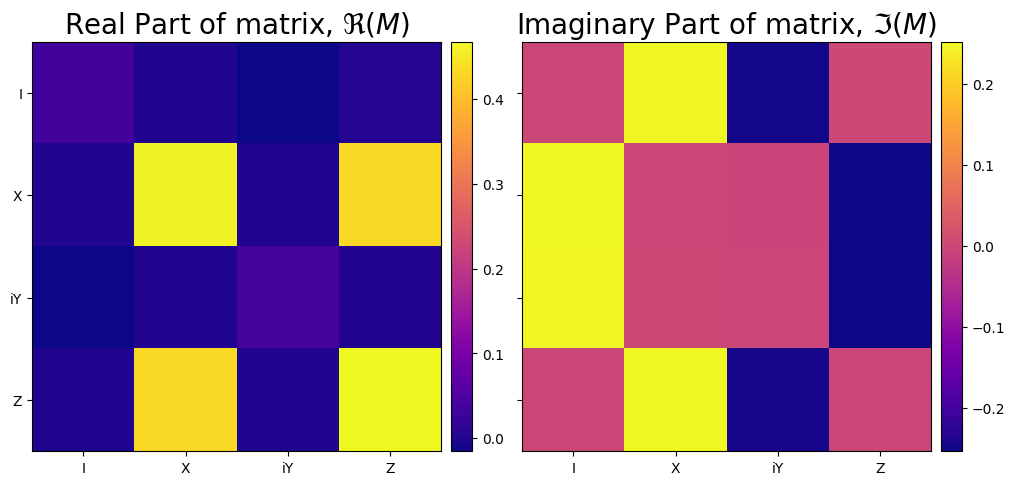

In [138]:
lambdamatrix = np.array([[1,0,0,1],
                         [0,1,1,0],
                         [0,1,-1,0],
                         [1,0,0,-1]])

erho00 = np.array([[0.503, 0.42+0.005j],
                  [0.42-0.005j, 0.497]])

erho11 = np.array([[0.498, -0.416+0.001j],
                  [-0.416-0.001j, 0.502]])

erhoxx = np.array([[0.949, -0.003-0.002j],
                  [-0.003+0.002j, 0.051]])

erhoyy = np.array([[0.496, 0.002+0.427j],
                  [0.002-0.427j, 0.504]])

erho1 = erho00
erho4 = erho11
erho2 = erhoxx - 1j*erhoyy - 0.5*(1 - 1j)*(erho00 + erho11)
erho3 = erhoxx + 1j*erhoyy - 0.5*(1 - 1j)*(erho00 + erho11)

rhomatrix = np.hstack([np.vstack([erho1, erho2]), np.vstack([erho3, erho4])])
chiexp = 0.25*lambdamatrix@rhomatrix@lambdamatrix

heatmap2d(chiexp, ['I', 'X', 'iY', 'Z'])

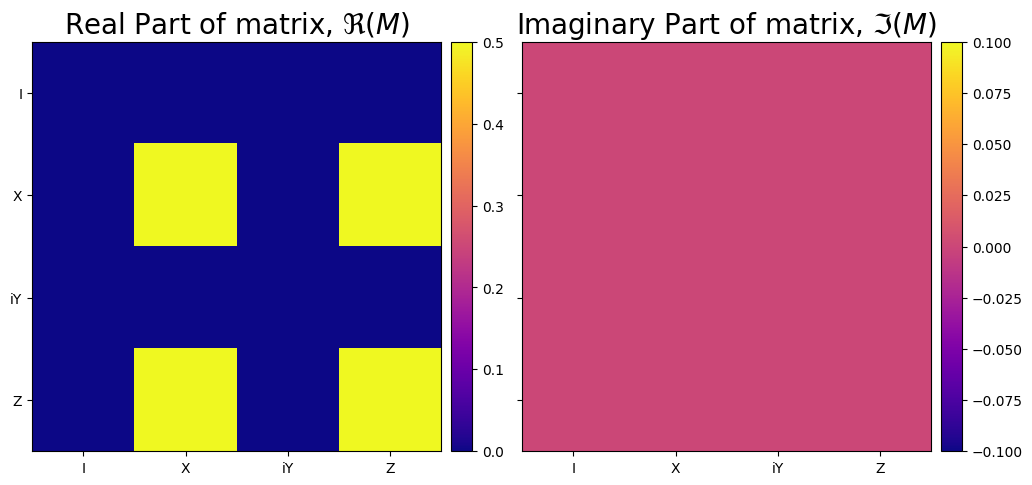

In [103]:
chitarget = np.array([[0,0,0,0],
                      [0,0.5,0,0.5],
                      [0,0,0,0],
                      [0,0.5,0,0.5]])

heatmap2d(chitarget, ['I', 'X', 'iY', 'Z'])

Clearly the real parts of the experimental and target chi matrices match up.

Part E

In [20]:


fidelity =  np.trace(chiexp@chitarget)
fidelity

(0.89675+0.0002500000000000002j)

We get a process fidelity of 0.897

Part f

In [118]:
#Construct operator basis
I2 = np.identity(2)
opbasis = [I2, np.array([[0,1],[1,0]]), -1j*np.array([[0,-1j],[1j,0]]), 
         np.array([[1,0],[0,-1]])]

In [128]:
#find eigenvectors and eigenvalues of experimental chi matrix
evals = la.eig(chiexp)[0]
evectors = la.eig(chiexp)[1]
sum(evals)

(0.9999999999999983-1.3877787807814457e-16j)

In [130]:
#Return probabilities of the Ak's
Pk = np.real(evals)
Pk

array([ 0.89553359, -0.03752926,  0.15632068, -0.01432501])

The eigenvalues of the chi matrix give the probabilities of their respective Kraus operators. As we can see, the Hadamard jump operator A1 (derived below) has a 0.89 probability, consistent with our process fidelity of 0.89

In [125]:

#Compute the four Kraus operators from eigenvectors of chi matrix
#The eigenvectors are the coefficients of our basis operators
A = [np.zeros([2,2]),np.zeros([2,2]),np.zeros([2,2]),np.zeros([2,2])]
for i in range(0,4):
    for j in range(0,4):
        A[i] = A[i] + evectors[j][i]*opbasis[j]
A

[array([[ 0.73605783+0.18490938j,  0.6244305 -0.17245252j],
        [ 0.52148651-0.54802049j, -0.63079946+0.18490938j]]),
 array([[-0.67763937+0.22051263j, -0.14016345-0.02717404j],
        [ 1.16972376-0.02717404j,  0.23941997+0.2132623j ]]),
 array([[-0.84635727-0.43058369j, -0.19002443+0.14765445j],
        [ 0.97618779+0.14765445j,  0.0043635 -0.25612976j]]),
 array([[ 1.17709229+0.02793099j, -0.29182448+0.14384848j],
        [-0.69145008-0.1118091j ,  0.1281993 -0.02793099j]])]

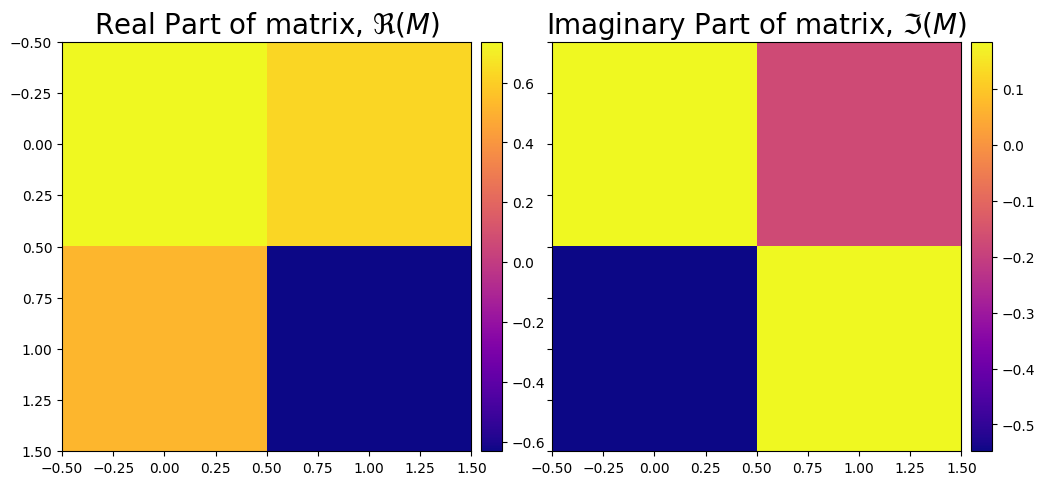

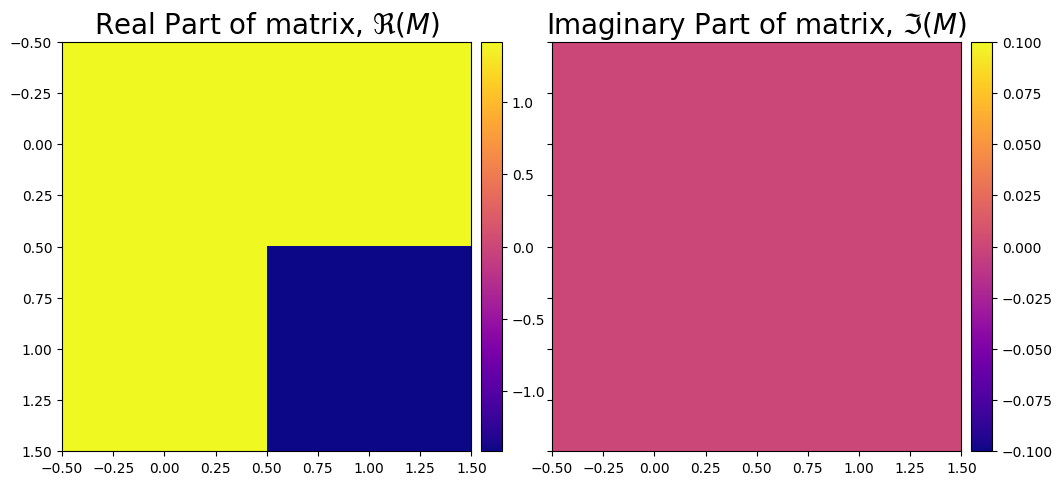

Hadamard gate fidelity (3.5535994893355345-1.0189026952280171j)


In [133]:
A[0]
hadamard = sq2*np.array([[1,1],[1,-1]])
heatmap2d(A[0])
heatmap2d(hadamard)

As we can see, A0 clearly corresponds to the Hadamard gate, as expected.

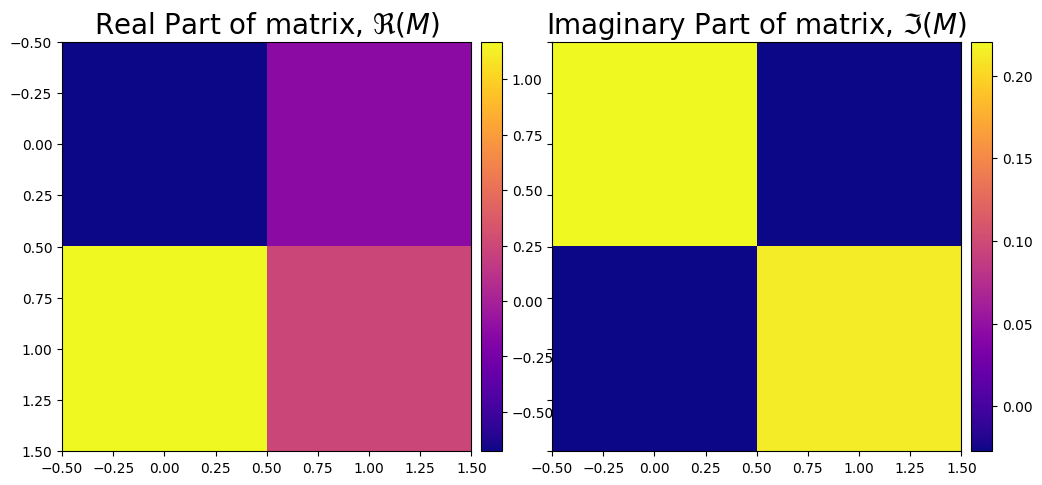

In [127]:
heatmap2d(A[1])

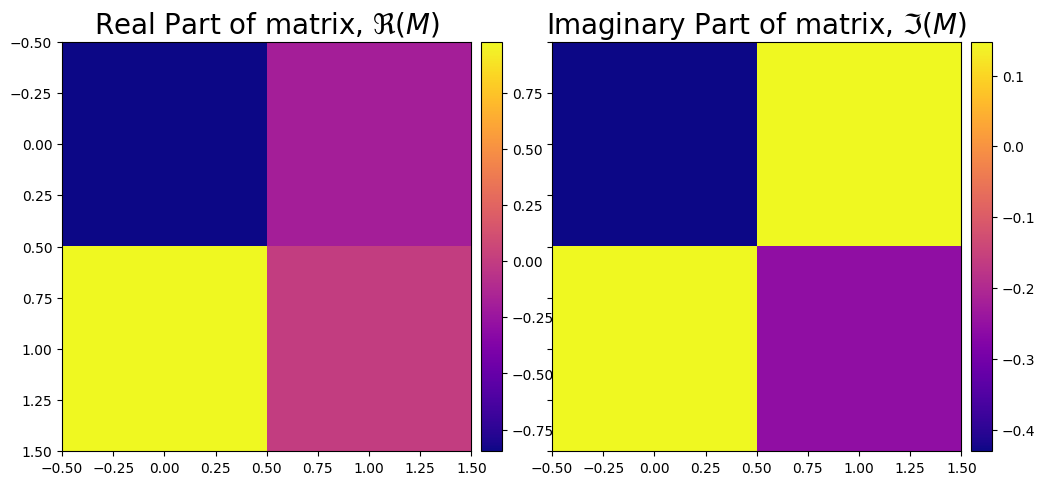

In [93]:
heatmap2d(A[2])

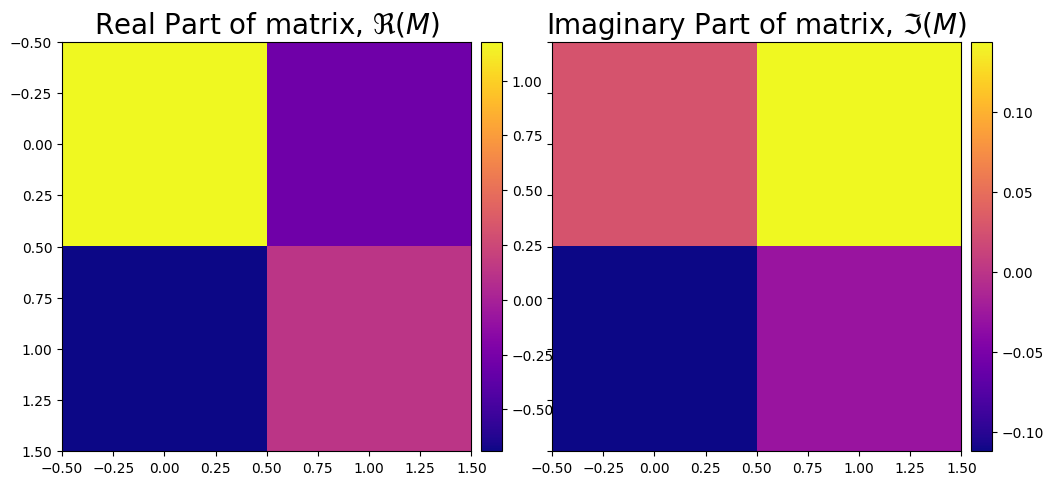

In [94]:
heatmap2d(A[3])

## Problem 2

Part A

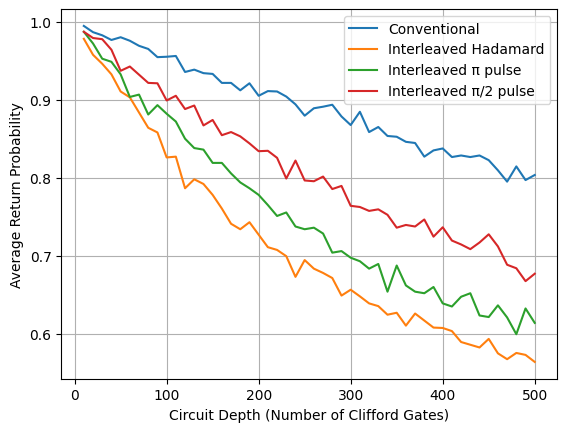

In [73]:
#Read CSV files into pandas dataframe
refRB = pd.read_csv('PS7-data/ref_RB.csv', index_col=0, header=None)
h_RB = pd.read_csv('PS7-data/H_RB.csv', index_col=0, header=None)
piRB = pd.read_csv('PS7-data/pi_RB.csv', index_col=0, header=None)
pi2RB = pd.read_csv('PS7-data/pi2_RB.csv', index_col=0, header=None)


refRBprob = 1 - refRB.mean(axis=1)
hRBprob = 1 - h_RB.mean(axis=1)
piRBprob = 1 - piRB.mean(axis=1)
pi2RBprob = 1 - pi2RB.mean(axis=1)

plt.plot(refRBprob, label='Conventional')
plt.plot(hRBprob, label='Interleaved Hadamard')
plt.plot(piRBprob, label='Interleaved π pulse')
plt.plot(pi2RBprob, label='Interleaved π/2 pulse')
plt.xlabel('Circuit Depth (Number of Clifford Gates)')
plt.ylabel('Average Return Probability')
plt.legend()
plt.grid()


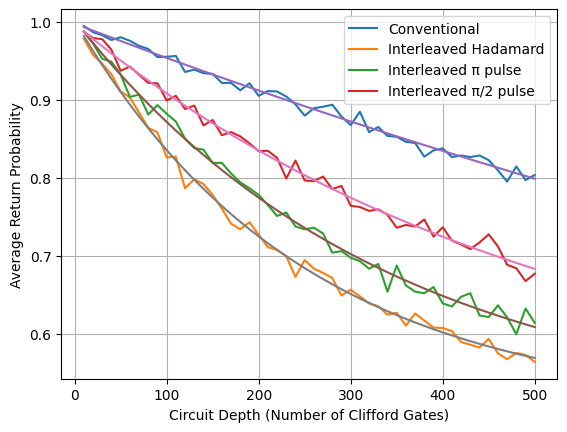

In [86]:
#Fit return probabilities and plot fitted functions
def fitfunc(m, p, A0, B0):
    return A0*(p**m) + B0

paramsref,_ = scipy.optimize.curve_fit(fitfunc, refRBprob.index,refRBprob)
paramsh,_ = scipy.optimize.curve_fit(fitfunc, hRBprob.index,hRBprob, p0=paramsref)
paramspi,_ = scipy.optimize.curve_fit(fitfunc, piRBprob.index,piRBprob, p0=paramsref)
paramspi2,_ = scipy.optimize.curve_fit(fitfunc, pi2RBprob.index,pi2RBprob, p0=paramsref)

plt.plot(refRBprob, label='Conventional')
plt.plot(hRBprob, label='Interleaved Hadamard')
plt.plot(piRBprob, label='Interleaved π pulse')
plt.plot(pi2RBprob, label='Interleaved π/2 pulse')
plt.xlabel('Circuit Depth (Number of Clifford Gates)')
plt.ylabel('Average Return Probability')
plt.legend()
plt.grid()
plt.plot(refRBprob.index, fitfunc(refRBprob.index, paramsref[0], paramsref[1], paramsref[2]))
plt.plot(piRBprob.index, fitfunc(piRBprob.index, paramspi[0], paramspi[1], paramspi[2]))
plt.plot(pi2RBprob.index, fitfunc(pi2RBprob.index, paramspi2[0], paramspi2[1], paramspi2[2]))
plt.plot(hRBprob.index, fitfunc(hRBprob.index, paramsh[0], paramsh[1], paramsh[2]))


In [87]:
#Print extracted p values
print(f'Conventional, p = {paramsref[0]}')
print(f'Interleaved Hadamard, p = {paramsh[0]}')
print(f'Interleaved pi pulse, p = {paramspi[0]}')
print(f'Interleaved pi/2 pulse, p = {paramspi2[0]}')

Conventional, p = 0.9994785115820173
Interleaved Hadamard, p = 0.9959578168008161
Interleaved pi pulse, p = 0.9970425347087212
Interleaved pi/2 pulse, p = 0.9980895232855949


Part C

In [90]:
#Compute average error rate r and average fidelity for conventional RB
r = ((2**1 -1)/2**1)*(1 - paramsref[0])
avgfid = 1 - r
print(f'Average Clifford gate error: {r}')
print(f'Average Clifford gate fidelity:  {avgfid}')

Average Clifford gate error: 0.0002607442089913592
Average Clifford gate fidelity:  0.9997392557910086


Part D

In [91]:
navg = 1.875 #physical gates per clifford gate
rphys = r / navg
avgfidphys = 1 - rphys
print(f'Average physical gate error: {rphys}')
print(f'Average physical gate fidelity:  {avgfidphys}')

Average physical gate error: 0.0001390635781287249
Average physical gate fidelity:  0.9998609364218712


Part E

In [92]:
#Hadamard gate error/fidelity
Fhadamard = 0.5*(1 - (paramsh[0]/paramsref[0]))
Rhadamard = 1 - Fhadamard

#pi2 gate error/fidelity
Fpi2 = 0.5*(1 - (paramspi2[0]/paramsref[0]))
Rpi2 = 1 - Fpi2

#pi gate error/fidelity
Fpi = 0.5*(1 - (paramspi[0]/paramsref[0]))
Rpi = 1 - Fpi

print(f'Average Hadamard gate error: {Rhadamard}')
print(f'Average Hadamard gate fidelity:  {Fhadamard}')
print(f'Average pi gate error: {Rpi}')
print(f'Average pi gate fidelity:  {Fpi}')
print(f'Average pi/2 gate error: {Rpi2}')
print(f'Average pi/2 gate fidelity:  {Fpi2}')

Average Hadamard gate error: 0.998238734129647
Average Hadamard gate fidelity:  0.0017612658703529682
Average pi gate error: 0.998781376065084
Average pi gate fidelity:  0.0012186239349160077
Average pi/2 gate error: 0.9993051434921678
Average pi/2 gate fidelity:  0.0006948565078321867
